# Image gender and age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from keras.layers import *
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import Model

import cv2



from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings("ignore")

C:\Users\RAHUL KUMAR\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.DataFrame({"img":os.listdir(r"D:\Ukface\archive (5)\UTKFace")})

In [3]:
df.head()

,img
0,100_0_0_20170112213500903.jpg.chip.jpg
1,100_0_0_20170112215240346.jpg.chip.jpg
2,100_1_0_20170110183726390.jpg.chip.jpg
3,100_1_0_20170112213001988.jpg.chip.jpg
4,100_1_0_20170112213303693.jpg.chip.jpg


In [4]:
df["age"]=df.img.apply(lambda x:int(x.split("_")[0]))
df["sex"]=df.img.apply(lambda x:0 if int(x.split("_")[1])==0 else 1)

In [5]:
df.head()

,img,age,sex
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1


In [6]:
df.sex.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='age', ylabel='Count'>

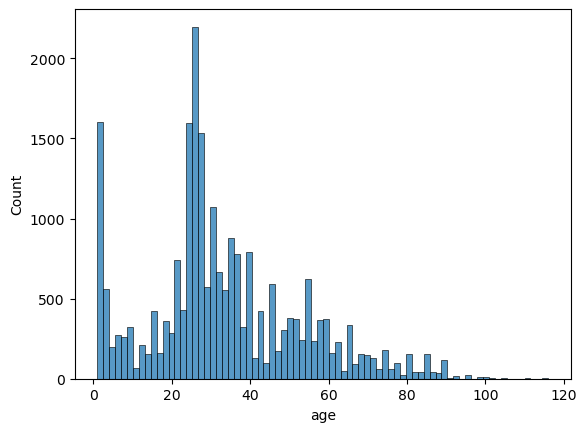

In [7]:
sns.histplot(df.age)

In [154]:
train_df,test_df=train_test_split(df,test_size=0.2)

In [9]:
train_df.head()

,img,age,sex
470,14_0_0_20170104011738192.jpg.chip.jpg,14,female
7731,26_1_3_20170119180813956.jpg.chip.jpg,26,male
12478,34_0_0_20170119180157900.jpg.chip.jpg,34,female
15881,41_0_0_20170117131137875.jpg.chip.jpg,41,female
14331,37_0_3_20170119202410749.jpg.chip.jpg,37,female


In [10]:
test_df.head()

,img,age,sex
23642,9_0_0_20170110225249086.jpg.chip.jpg,9,female
11693,32_0_0_20170117182429685.jpg.chip.jpg,32,female
8241,27_1_0_20170104234600194.jpg.chip.jpg,27,male
14783,39_0_0_20170103183230555.jpg.chip.jpg,39,female
14094,36_1_1_20170116155035948.jpg.chip.jpg,36,male


# Lets try to predict Gender first 

In [11]:
train_datagen=ImageDataGenerator(rotation_range=0.3,shear_range=0.2,zoom_range=0.3,rescale=1/255)

test_datagen=ImageDataGenerator(rescale=1/255)

In [12]:
train_img=train_datagen.flow_from_dataframe(train_df,directory=r"D:\Ukface\archive (5)\UTKFace",x_col='img',
                                           y_col="sex",batch_size=32,class_mode="binary")

Found 18966 validated image filenames belonging to 2 classes.


In [13]:
test_img=test_datagen.flow_from_dataframe(test_df,directory=r"D:\Ukface\archive (5)\UTKFace",x_col='img',
                                           y_col="sex",batch_size=32,class_mode="binary")

Found 4742 validated image filenames belonging to 2 classes.


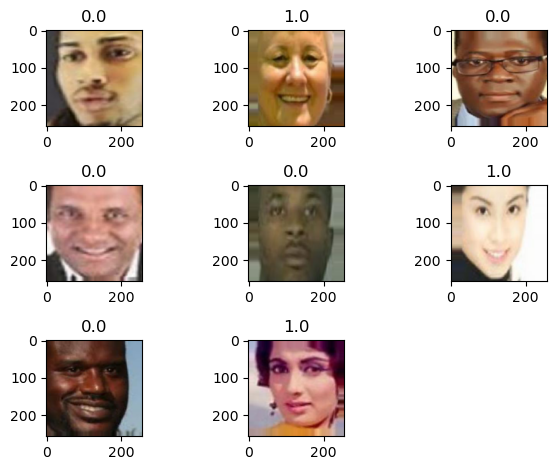

In [16]:
a=next(train_img)


for i in range(1,9):
    plt.subplot(3,3,i)
    plt.imshow(a[0][i])
    plt.title(a[1][i])
    
    
plt.tight_layout()

# Lets try transfer Learninig

In [121]:
conv_base=keras.applications.MobileNet(input_shape=(256,256,3),include_top=False)

In [122]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 128, 128, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 128, 128, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 16, 16, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 16, 16, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 16, 16, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 16, 16, 512)       4608      
 )        

In [123]:
conv_base.trainable=False

In [124]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 128, 128, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 128, 128, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 16, 16, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 16, 16, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 16, 16, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 16, 16, 512)       4608      
 )        

In [125]:
model1=Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(64,activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation="sigmoid"))

In [126]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 8, 8, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 dense_13 (Dense)            (None, 64)                4194368   
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 7423297 (28.32 MB)
Trainable params: 4194433 (16.00 MB)
Non-trainable params: 3228864 (12.32 MB)
_________

In [127]:
model1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [128]:
model1.fit_generator(train_img,epochs=5,validation_data=test_img,steps_per_epoch=80)

Epoch 1/5
80/80 [==============================] - 113s 1s/step - loss: 1.8056 - accuracy: 0.7180 - val_loss: 0.3828 - val_accuracy: 0.8410
Epoch 2/5
80/80 [==============================] - 113s 1s/step - loss: 0.4187 - accuracy: 0.8121 - val_loss: 0.3410 - val_accuracy: 0.8574
Epoch 3/5
80/80 [==============================] - 112s 1s/step - loss: 0.3628 - accuracy: 0.8281 - val_loss: 0.3303 - val_accuracy: 0.8507
Epoch 4/5
80/80 [==============================] - 123s 2s/step - loss: 0.3582 - accuracy: 0.8263 - val_loss: 0.2960 - val_accuracy: 0.8669
Epoch 5/5
80/80 [==============================] - 119s 1s/step - loss: 0.3249 - accuracy: 0.8531 - val_loss: 0.2955 - val_accuracy: 0.8667


In [129]:
model1.fit_generator(train_img,epochs=10,validation_data=test_img,steps_per_epoch=80,initial_epoch=6)

Epoch 7/10
80/80 [==============================] - 126s 2s/step - loss: 0.3377 - accuracy: 0.8414 - val_loss: 0.2940 - val_accuracy: 0.8621
Epoch 8/10
80/80 [==============================] - 128s 2s/step - loss: 0.3335 - accuracy: 0.8574 - val_loss: 0.3154 - val_accuracy: 0.8617
Epoch 9/10
80/80 [==============================] - 125s 2s/step - loss: 0.3406 - accuracy: 0.8457 - val_loss: 0.3116 - val_accuracy: 0.8602
Epoch 10/10
80/80 [==============================] - 127s 2s/step - loss: 0.3218 - accuracy: 0.8617 - val_loss: 0.2749 - val_accuracy: 0.8792


#### we got good accuracy for classifying gender in by using mobilenet architecture

## **Now we will try VGG16 architecture**

In [19]:
vgg_conv=VGG16(input_shape=(256,256,3),include_top=False)
vgg_conv.trainable=False

In [20]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
model2=Sequential()
model2.add(vgg_conv)
model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(64,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation="sigmoid"))


In [23]:
model2.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
model2.fit_generator(train_img,epochs=5,validation_data=test_img,steps_per_epoch=80)

Epoch 1/5


80/80 [==============================] - 1144s 14s/step - loss: 0.8488 - accuracy: 0.5516 - val_loss: 0.6460 - val_accuracy: 0.6449
Epoch 2/5
80/80 [==============================] - 1187s 15s/step - loss: 0.6357 - accuracy: 0.6414 - val_loss: 0.6438 - val_accuracy: 0.7394
Epoch 3/5
80/80 [==============================] - 1128s 14s/step - loss: 0.6104 - accuracy: 0.7071 - val_loss: 0.5490 - val_accuracy: 0.8191
Epoch 4/5
80/80 [==============================] - 1129s 14s/step - loss: 0.5784 - accuracy: 0.7408 - val_loss: 0.5151 - val_accuracy: 0.8319
Epoch 5/5
80/80 [==============================] - 1469s 19s/step - loss: 0.5675 - accuracy: 0.7212 - val_loss: 0.4912 - val_accuracy: 0.8427


#### we got accuracy of 84% within 5 epochs with VGG16 but model training is bit slow in comparison to MobileNet

# Now we will try general model in which we will predict age and gender both with one model only using functional API

In [158]:
conv_base=keras.applications.MobileNet(include_top=False,input_shape=(256,256,3))

In [159]:
conv_base.trainable=False

In [160]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 128, 128, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 128, 128, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 16, 16, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 16, 16, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 16, 16, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 16, 16, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 16, 16, 512)       4608      
 )        

In [161]:
output=conv_base.layers[-1].output

In [162]:
flatten=Flatten()(output)
Dense1=Dense(128,activation="relu")(flatten)
Dense2=Dense(128,activation="relu")(flatten)




output1=Dense(1,activation="linear",name="age")(Dense1)
output2=Dense(1,activation="sigmoid",name="sex")(Dense2)



In [163]:
model3=Model(inputs=conv_base.input,outputs=[output1,output2])

In [164]:
model3.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 128, 128, 32)         864       ['input_9[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           (None, 128, 128, 32)         0         ['conv1_bn[0][0]']      

                                                                                                  
 conv_pw_5 (Conv2D)          (None, 32, 32, 256)          65536     ['conv_dw_5_relu[0][0]']      
                                                                                                  
 conv_pw_5_bn (BatchNormali  (None, 32, 32, 256)          1024      ['conv_pw_5[0][0]']           
 zation)                                                                                          
                                                                                                  
 conv_pw_5_relu (ReLU)       (None, 32, 32, 256)          0         ['conv_pw_5_bn[0][0]']        
                                                                                                  
 conv_pad_6 (ZeroPadding2D)  (None, 33, 33, 256)          0         ['conv_pw_5_relu[0][0]']      
                                                                                                  
 conv_dw_6

 conv_pw_10_relu (ReLU)      (None, 16, 16, 512)          0         ['conv_pw_10_bn[0][0]']       
                                                                                                  
 conv_dw_11 (DepthwiseConv2  (None, 16, 16, 512)          4608      ['conv_pw_10_relu[0][0]']     
 D)                                                                                               
                                                                                                  
 conv_dw_11_bn (BatchNormal  (None, 16, 16, 512)          2048      ['conv_dw_11[0][0]']          
 ization)                                                                                         
                                                                                                  
 conv_dw_11_relu (ReLU)      (None, 16, 16, 512)          0         ['conv_dw_11_bn[0][0]']       
                                                                                                  
 conv_pw_1

In [155]:
train_img=train_datagen.flow_from_dataframe(train_df,directory=r"D:\Ukface\archive (5)\UTKFace",x_col='img',
                                           y_col=["age","sex"],batch_size=32,class_mode="multi_output",)

Found 18966 validated image filenames.


In [156]:
test_img=test_datagen.flow_from_dataframe(test_df,directory=r"D:\Ukface\archive (5)\UTKFace",x_col='img',
                                           y_col=["age","sex"],batch_size=32,class_mode="multi_output",)

Found 4742 validated image filenames.


In [165]:
model3.compile(optimizer="Adam",loss={"sex":"binary_crossentropy","age":"mae"},
               metrics={"age":"mae","sex":"accuracy"})

In [166]:
model3.fit_generator(train_img,epochs=5,validation_data=test_img,steps_per_epoch=80)

Epoch 1/5
80/80 [==============================] - 128s 2s/step - loss: 18.9389 - age_loss: 15.9211 - sex_loss: 3.0178 - age_mae: 15.9211 - sex_accuracy: 0.7477 - val_loss: 9.7373 - val_age_loss: 9.1631 - val_sex_loss: 0.5743 - val_age_mae: 9.1631 - val_sex_accuracy: 0.8581
Epoch 2/5
80/80 [==============================] - 125s 2s/step - loss: 9.9003 - age_loss: 9.1160 - sex_loss: 0.7842 - age_mae: 9.1160 - sex_accuracy: 0.8309 - val_loss: 9.2340 - val_age_loss: 8.4362 - val_sex_loss: 0.7977 - val_age_mae: 8.4362 - val_sex_accuracy: 0.8507
Epoch 3/5
80/80 [==============================] - 125s 2s/step - loss: 9.5516 - age_loss: 8.8063 - sex_loss: 0.7452 - age_mae: 8.8063 - sex_accuracy: 0.8367 - val_loss: 10.0515 - val_age_loss: 9.3788 - val_sex_loss: 0.6727 - val_age_mae: 9.3788 - val_sex_accuracy: 0.8596
Epoch 4/5
80/80 [==============================] - 123s 2s/step - loss: 8.9560 - age_loss: 8.3696 - sex_loss: 0.5864 - age_mae: 8.3696 - sex_accuracy: 0.8547 - val_loss: 8.4472 - v

In [167]:
model3.fit_generator(train_img,epochs=10,validation_data=test_img,steps_per_epoch=80,initial_epoch=6)

Epoch 7/10
80/80 [==============================] - 146s 2s/step - loss: 8.6592 - age_loss: 8.2019 - sex_loss: 0.4573 - age_mae: 8.2019 - sex_accuracy: 0.8559 - val_loss: 8.0091 - val_age_loss: 7.6047 - val_sex_loss: 0.4044 - val_age_mae: 7.6047 - val_sex_accuracy: 0.8733
Epoch 8/10
80/80 [==============================] - 126s 2s/step - loss: 8.0245 - age_loss: 7.5785 - sex_loss: 0.4461 - age_mae: 7.5785 - sex_accuracy: 0.8486 - val_loss: 7.9880 - val_age_loss: 7.6199 - val_sex_loss: 0.3681 - val_age_mae: 7.6199 - val_sex_accuracy: 0.8781
Epoch 9/10
80/80 [==============================] - 138s 2s/step - loss: 8.4174 - age_loss: 8.0018 - sex_loss: 0.4156 - age_mae: 8.0018 - sex_accuracy: 0.8566 - val_loss: 8.1211 - val_age_loss: 7.7678 - val_sex_loss: 0.3533 - val_age_mae: 7.7678 - val_sex_accuracy: 0.8749
Epoch 10/10
80/80 [==============================] - 137s 2s/step - loss: 7.7438 - age_loss: 7.4268 - sex_loss: 0.3170 - age_mae: 7.4268 - sex_accuracy: 0.8770 - val_loss: 8.8081 - 

In [168]:
model3.fit_generator(train_img,epochs=13,validation_data=test_img,steps_per_epoch=80,initial_epoch=11)

Epoch 12/13
80/80 [==============================] - 120s 2s/step - loss: 7.7811 - age_loss: 7.4746 - sex_loss: 0.3065 - age_mae: 7.4746 - sex_accuracy: 0.8820 - val_loss: 7.6738 - val_age_loss: 7.3546 - val_sex_loss: 0.3192 - val_age_mae: 7.3546 - val_sex_accuracy: 0.8771
Epoch 13/13
80/80 [==============================] - 120s 2s/step - loss: 7.8091 - age_loss: 7.5201 - sex_loss: 0.2890 - age_mae: 7.5201 - sex_accuracy: 0.8902 - val_loss: 7.5803 - val_age_loss: 7.2595 - val_sex_loss: 0.3208 - val_age_mae: 7.2595 - val_sex_accuracy: 0.8827


**we got validation accurcay=88% for sex  and validation MAE =7.25 by using only one layer for gender and one layer for sex(hidden) which is quite good. We can even get better accuracy by using little more complex model but for Now our purpose is to just learn functional API of keras that how we can fit model for multioutput or multiinput using keras functional API . We also used MobileNet and VGG16 CNN architecture**